# Objective: To Build a song Recommender

# Dataset used: Million Songs Dataset 
    
Source: http://labrosa.ee.columbia.edu/millionsong/ 

# Q1. Load Required Libraries and music data

Load Music data:
    
Read userid-songid-listen_count triplets
This step might take time to download data from external sources

triplets_file 'https://static.turi.com/datasets/millionsong/10000.txt'

songs_metadata_file 'https://static.turi.com/datasets/millionsong/song_data.csv'

Hint:
Merge the two dataframes above to create input dataframe for recommender systems(triplet and metadata file)

In [40]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 




In [14]:
#Read userid-songid-listen_count triplets
#This step might take time to download data from external sources
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

song_df_1 = pandas.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
song_df_2 =  pandas.read_csv(songs_metadata_file)

#Merge the two dataframes above to create input dataframe for recommender systems
song_df = pandas.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left") 

In [15]:
print(song_df_1.head())
len(song_df_1)

                                    user_id             song_id  listen_count
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0             1
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D             1
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273             1


2000000

In [16]:
song_df_2.head()
len(song_df_2)
print(song_df_2.head(5))
len(song_df)
print(song_df.head(5))

              song_id              title  \
0  SOQMMHC12AB0180CB8       Silent Night   
1  SOVFVAK12A8C1350D9        Tanssi vaan   
2  SOGTUKN12AB017F4F1  No One Could Ever   
3  SOBNYVR12A8C13558C      Si Vos Querés   
4  SOHSBXH12A8C13B0DF   Tangle Of Aspens   

                                release       artist_name  year  
0                 Monster Ballads X-Mas  Faster Pussy cat  2003  
1                           Karkuteillä  Karkkiautomaatti  1995  
2                                Butter    Hudson Mohawke  2006  
3                               De Culo       Yerba Brava  2003  
4  Rene Ablaze Presents Winter Sessions        Der Mystic     0  
                                    user_id             song_id  listen_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0             1   
3  b80344d063b5

# Q2. Explore data

Music data shows how many times a user listened to a song, as well as the details of the song.

# Length of the dataset

2000000
                                    user_id             song_id  listen_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0             1   
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D             1   
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273             1   

             title                        release    artist_name  year  
0         The Cove             Thicker Than Water   Jack Johnson     0  
1  Entre Dos Aguas            Flamenco Para Niños  Paco De Lucia  1976  
2         Stronger                     Graduation     Kanye West  2007  
3   Constellations              In Between Dreams   Jack Johnson  2005  
4     Learn To Fly  There Is Nothing Left To Lose   Foo Fighters  1999  


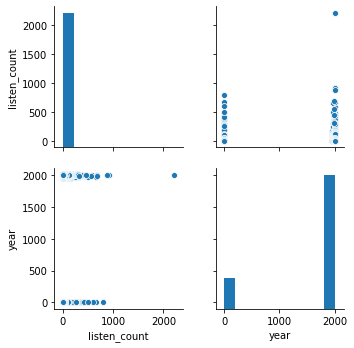

In [21]:
print(len(song_df))
print(song_df.head(5))

sns.pairplot(song_df)

In [ ]:
sns.heatmap()

# Q3. Create a subset of the dataset

a. Show the most popular songs in the dataset

b. Count number of unique users in the dataset

c. Count the number of unique songs in the dataset

# Count number of unique users in the dataset

In [23]:
song_df = song_df.head(10000)
#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']
song_df.head(10)

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007,Apuesta Por El Rock 'N' Roll - Héroes del Sile...
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008,Paper Gangsta - Lady GaGa
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999,Stacked Actors - Foo Fighters
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0,Sehr kosmisch - Harmonia
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002,Heaven's gonna burn your eyes - Thievery Corpo...


In [28]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count','song'], ascending =[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


# Count the number of unique songs in the dataset

In [37]:
users=song_df['user_id'].unique()
print(len(users))
sng=song_df['song'].unique()
print(len(sng))

365
5151


# Q4. Create a song recommender

In [48]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))
print(train_data.shape)

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

# Q5. Build Popularity Recommender model. (Non-personalised)

a. Count of user_id for each unique song as recommendation score 

b. Sort the songs on recommendation score 

c. Get the top 5 recommendations

In [53]:
train_data_grouped = train_data.groupby('song_id').agg({'user_id': 'count'}).reset_index()
train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
train_data_grouped.head()
train_data_sort = train_data_grouped.sort_values(['score', 'song_id'], ascending = [0,1]) 
train_data_sort.head(5)

,song_id,score
1006,SOFRQTD12A81C233C0,37
146,SOAUWYT12A81C206F1,27
166,SOAXGDH12A8C13F8A1,24
286,SOBONKR12A58A7A7E0,24
2481,SONYKOW12AB01849C9,21


In [57]:
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,song_id,score,Rank
1006,SOFRQTD12A81C233C0,37,1.0
146,SOAUWYT12A81C206F1,27,2.0
166,SOAXGDH12A8C13F8A1,24,3.0
286,SOBONKR12A58A7A7E0,24,4.0
2481,SONYKOW12AB01849C9,21,5.0


# Q6. Use popularity based recommender model to make predictions and find recommendations for random list of users with inferences

Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. It is not personalized to particular user